# (Simple) Edge detection

In [428]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

(425, 425)

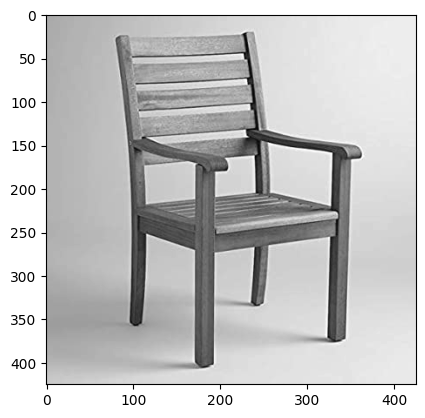

In [429]:
img = cv2.imread('./images/Chair.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap = "gray")
img.shape

## Steps

### 1. Reducir ruido

Opciones

- Band-pass filter.


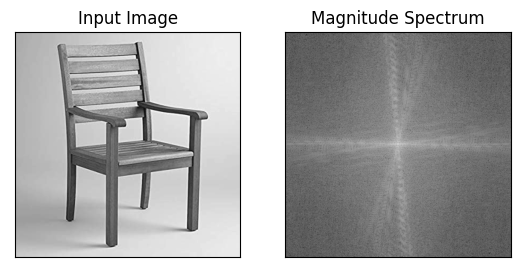

In [430]:
img_float32 = np.float32(img)
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show() 

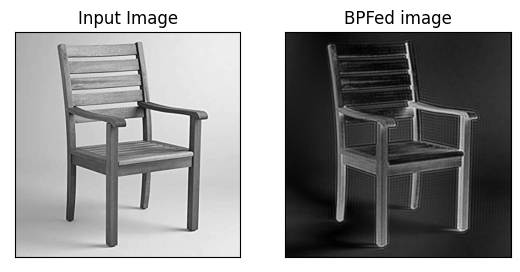

In [431]:
rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)     # center

one, two = 75, 1
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-one:crow+one, ccol-one:ccol+one] = 1
mask[crow-two:crow+two, ccol-two:ccol+two] = 0

fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('BPFed image'), plt.xticks([]), plt.yticks([])

plt.show()

### 2. Gradientes

Opciones

- Lineales (n x 1)

- Kernels (n x n)

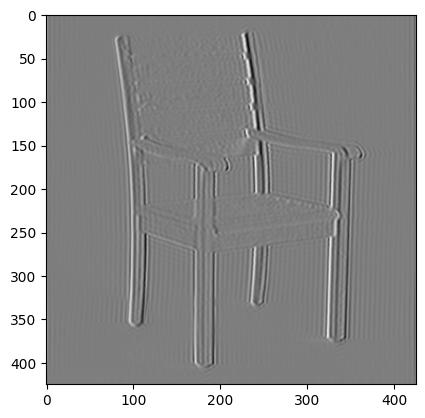

In [432]:
imgOne = cv2.filter2D(img_back, -1,(np.array(
   [  [-1,0,1],
      [-1,0,1],
      [-1,0,1]
   ]
)))
imgOne = np.add(imgOne, np.max(np.abs(imgOne)))
imgOne = imgOne/np.max(imgOne)*255
plt.imshow(imgOne, cmap = "gray")

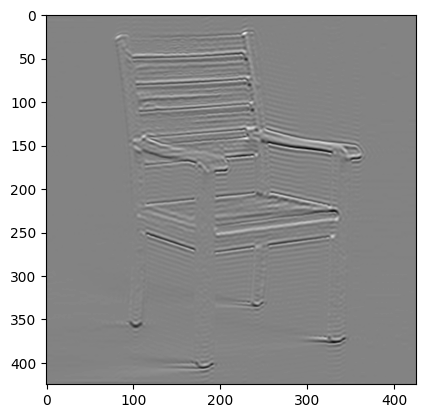

In [433]:
imgTwo = cv2.filter2D(img_back, -1,(np.array(
   [  [-1,-1,-1],
      [0,0,0],
      [1,1,1]
   ]
)))
imgTwo = np.add(imgTwo, np.max(np.abs(imgTwo)))
imgTwo = imgTwo/np.max(imgTwo)*255
plt.imshow(imgTwo, cmap = "gray")

(425, 425)


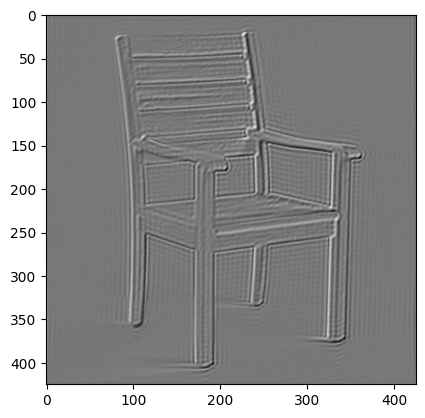

In [434]:
img = cv2.addWeighted(imgOne, 0.5, imgTwo, 0.5, 0)
print(img.shape)
plt.imshow(img, cmap = "gray")

In [435]:
print(img)

[[129.3179   139.69789  132.11154  ... 126.415634 117.952835 129.3179  ]
 [134.1632   145.26332  138.90225  ... 127.44593  117.928635 129.244   ]
 [130.59691  142.71596  134.18982  ... 126.40329  116.969025 129.29344 ]
 ...
 [128.65628  125.92473  128.97916  ... 128.21942  123.79758  129.27582 ]
 [128.64038  128.56277  131.99356  ... 128.86824  123.09468  129.17813 ]
 [129.3179   128.6575   129.91473  ... 127.6576   122.63743  129.3179  ]]


[ 48.718304  55.136017  55.456764 ... 209.57785  216.08908  220.59747 ]


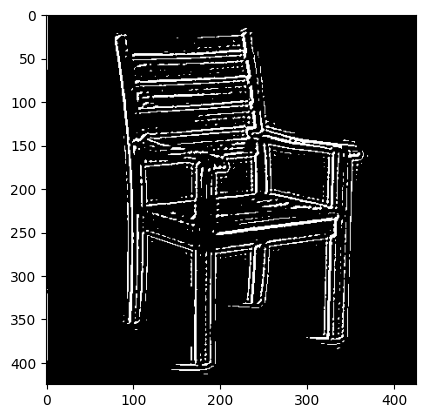

In [436]:
print(np.unique(img))
x = 138
_, img = cv2.threshold(img, x, x, cv2.THRESH_BINARY)
plt.imshow(img, cmap = 'gray')

In [437]:
print(img)

[[  0. 138.   0. ...   0.   0.   0.]
 [  0. 138. 138. ...   0.   0.   0.]
 [  0. 138.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


### 3. Limpiar trazo

Opciones

- Open 

- Close

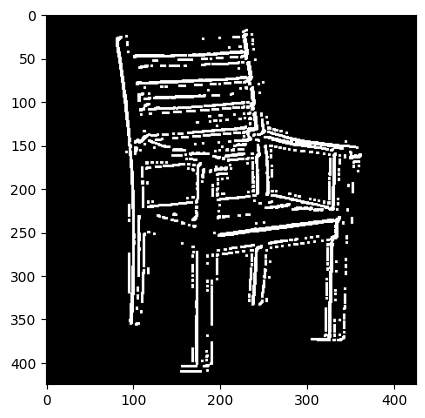

In [438]:
#Open
"""
k = np.array([
    [0, 0, 1, 0, 1],
    [0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0],
    [1, 1, 1, 0, 0],
    [1, 0, 1, 0, 0]
]
)
"""
k = np.array([[1, 1], [1, 1]])
img = cv2.erode(img, k, iterations=1)
img = cv2.dilate(img, k, iterations=2)
plt.imshow(img, cmap= 'gray')